# 03. Electric Vehicle - Exploratory Data Analysis

The electric vehicle (EV) market is expanding rapidly, and this notebook aims to move beyond the hype to quantify real adoption patterns.
Using Washington State’s public EV data as a proxy for broader U.S. trends, the analysis asks a core question:
how do vehicle specifications—such as range—relate to what people actually buy, and where those vehicles cluster across counties, makes, and models?

To answer this, the notebook will build profiles, visualize relationships, and identify potential features for later modeling.
The story unfolds in three stages: profiling who and what defines the current EV landscape, exploring how technical and geographic patterns interact,
and pinpointing candidate features that help explain adoption behavior.

Key narrative anchors include the distribution of vehicle ranges, the population concentration of EVs by county,
brand dominance (particularly Tesla’s role), and a forward-looking view on per-capita adoption patterns.
Together, these insights will help ground the data in a broader understanding of how technical capability meets consumer choice.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [60]:
# ---- Paths (Windows) ----
pop_path   = r"C:\Users\teren\OneDrive\Documents\Education\05._SpringBoard\03._Capstone Project\EV_Project\02._Data\Electric_Vehicle_Population_Data_CLEAN.csv"
specs_path = r"C:\Users\teren\OneDrive\Documents\Education\05._SpringBoard\03._Capstone Project\EV_Project\02._Data\electric_vehicles_spec_2025_CLEAN.csv"

# ---- Load ----
pop   = pd.read_csv(pop_path)
specs = pd.read_csv(specs_path)

The first key metric is the range.
As an alternative-energy vehicle, this figure is especially meaningful because it directly competes with the miles per gallon (mpg) measure used
for combustion engine vehicles.

# 1) EV range distribution

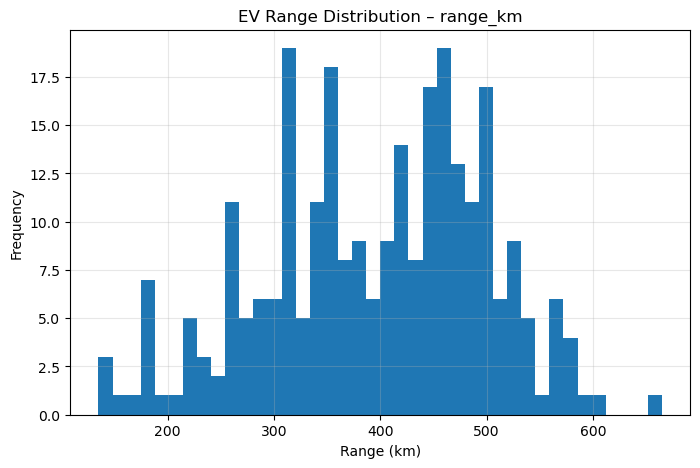

In [61]:
range_col = "range_km"  # Confirmed column name from dataset

if range_col in specs.columns and specs[range_col].notna().any():
    plt.figure(figsize=(8, 5))
    specs[range_col].dropna().plot(
        kind="hist",
        bins=40,
        title=f"EV Range Distribution – {range_col}"
    )
    plt.xlabel("Range (km)")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()
else:
    print(f"\nNo usable range column '{range_col}' found in specs.")

Values appear roughly from ~140 km to ~670 km. Most bars are concentrated between ~250 km and ~550 km. Multiple local peaks are visible, including noticeable tall bars around ~300–360 km and ~450–500 km. Very few entries appear beyond ~600 km.

This next step quantifies the distribution by summarizing numeric values and visualizing raw frequency peaks to confirm what the histogram shows.

count    270.00
mean     395.63
std      104.09
min      135.00
25%      320.00
50%      410.00
75%      470.00
max      665.00
Name: range_km, dtype: float64


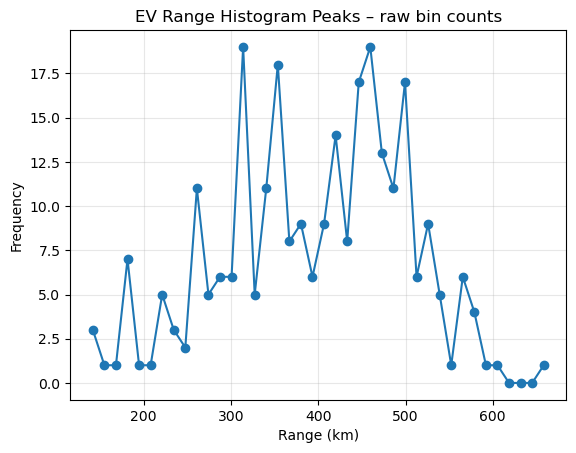

In [62]:
# Summary stats for range_km
if range_col in specs.columns:
    s = pd.to_numeric(specs[range_col], errors="coerce").dropna()
    print(s.describe().round(2))
else:
    print(f"Column '{range_col}' not found.")

# Quick visual check for peak regions (no smoothing, no seaborn)
counts, bins = np.histogram(s, bins=40)
plt.plot((bins[:-1] + bins[1:]) / 2, counts, marker="o")
plt.title("EV Range Histogram Peaks – raw bin counts")
plt.xlabel("Range (km)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


The range data suggests a segmentation of electric vehicles by type, where range specifications align with distinct vehicle categories. In the EV market, range is less about maximum distance alone and more about how users balance performance, cost, and preference trade-offs.

Next, we examine the key players, which are the vehicle manufacturers (Makes).

# 2) Makes in WA

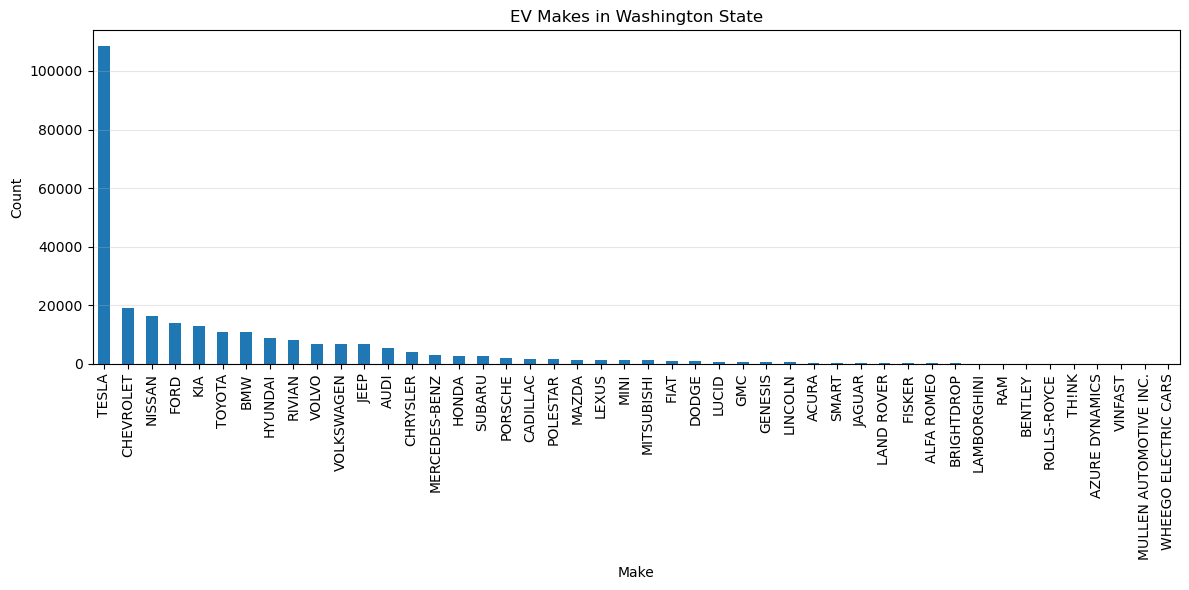

In [63]:
if "Make" in pop.columns:
    # Count makes
    make_counts = pop["Make"].value_counts()
    make_counts_df = make_counts.to_frame("Count")

    # Plot all makes
    plt.figure(figsize=(12, 6))
    make_counts.plot(kind="bar", title="EV Makes in Washington State")
    plt.xlabel("Make")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

else:
    print("Column 'Make' not found in population dataset.")

In [64]:
if "Make" in pop.columns:
    make_counts = pop["Make"].value_counts()
    make_counts_df = make_counts.to_frame("Count")

    # Quick descriptive statistics
    stats = make_counts.describe().to_dict()
    total_vehicles = int(make_counts.sum())
    median_count = int(make_counts.median())
    num_makes = len(make_counts)

    print("Quick Descriptive Statistics:")
    for k, v in stats.items():
        print(f"  {k}: {round(v, 2)}")
    print(f"  Number of makes: {num_makes}")
    print(f"  Total vehicles (WA market): {total_vehicles}")
    print(f"  Median count per make: {median_count}")


Quick Descriptive Statistics:
  count: 46.0
  mean: 5675.2
  std: 16231.53
  min: 2.0
  25%: 156.75
  50%: 1199.5
  75%: 6346.25
  max: 108466.0
  Number of makes: 46
  Total vehicles (WA market): 261059
  Median count per make: 1199


Tesla leads Washington State’s EV market with 41.6% of all registered vehicles. Although dominant, it falls short of a monopoly (below 51%).

This large share skews the data, as every other manufacturers holds much smaller portions. Twenty-three manufacturers exceed the median, showing active competition. The median of 1,199 vehicles per make gives a clearer view of the market than the mean of 5,676, which is inflated by Tesla’s scale and limited to twelve major makes.

With 41 makes overall, Washington’s EV market remains diverse and competitive despite Tesla’s strong lead.

The next section focuses on where the EV markets focuses in Washington State.

# 3) Counties in WA

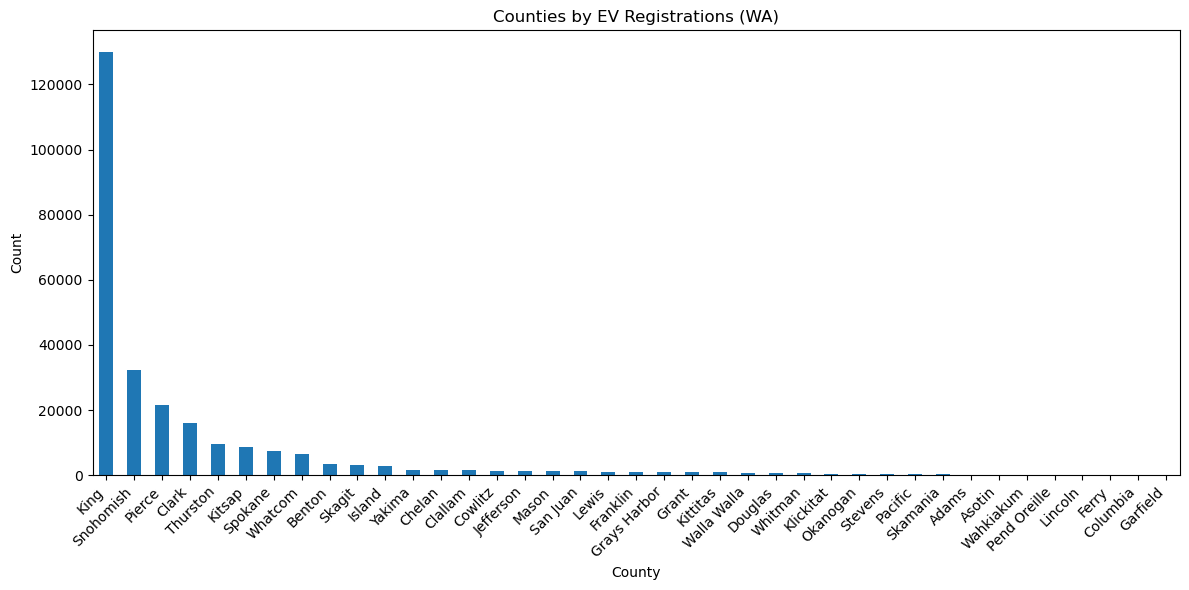

In [65]:
if "County" in pop.columns:
    top_counties = pop["County"].value_counts()
    plt.figure(figsize=(12, 6))
    top_counties.plot(kind="bar", title="Counties by EV Registrations (WA)")
    plt.xlabel("County"); plt.ylabel("Count"); plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()


In [68]:
# Calculate King County share
king_share = (top_counties["King"] / top_counties.sum()) * 100
print(f"King County holds {king_share:.1f}% of all EVs in Washington.")


King County holds 49.8% of all EVs in Washington.


The distribution is left-skewed, with King County, home to Seattle, accounting for nearly half (49.8%) of all EVs in Washington. This dominance aligns with expectations given its dense population, urban infrastructure, and strong EV adoption incentives.

The overall pattern mirrors the state’s population distribution, suggesting that EV ownership currently scales with population size rather than unique local factors. A deeper insight, however, would come from examining each county’s EV-to-population ratio to identify areas where adoption outpaces or lags behind demographic trends.

# 4) Specs correlation heatmap

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,length_mm,width_mm,height_mm
top_speed_kmh,1.000000,0.724296,0.361139,0.804648,0.127462,0.759413,-0.824204,0.799025,0.197823,-0.165311,-0.350441,0.396420,0.551387,-0.474269
battery_capacity_kWh,0.724296,1.000000,0.213594,0.773677,0.374543,0.862110,-0.662056,0.732787,0.440118,0.133608,-0.023483,0.665914,0.767612,-0.071199
number_of_cells,0.361139,0.213594,1.000000,0.162749,-0.079565,0.310296,-0.253145,0.092476,0.070692,0.089236,0.030543,0.180310,0.205762,-0.134208
torque_nm,0.804648,0.773677,0.162749,1.000000,0.321409,0.671749,-0.801278,0.667697,0.329573,-0.053333,-0.219499,0.443958,0.561167,-0.200486
efficiency_wh_per_km,0.127462,0.374543,-0.079565,0.321409,1.000000,-0.060467,0.057600,0.180503,0.130140,0.552328,0.594817,0.659042,0.573149,0.590874
range_km,0.759413,0.862110,0.310296,0.671749,-0.060467,1.000000,-0.760587,0.725420,0.347834,-0.105778,-0.336472,0.436897,0.545894,-0.458022
acceleration_0_100_s,-0.824204,-0.662056,-0.253145,-0.801278,0.057600,-0.760587,1.000000,-0.645181,-0.281698,0.302527,0.525740,-0.172040,-0.398656,0.523532
fast_charging_power_kw_dc,0.799025,0.732787,0.092476,0.667697,0.180503,0.725420,-0.645181,1.000000,0.147233,-0.094574,-0.191209,0.456869,0.578840,-0.358180
towing_capacity_kg,0.197823,0.440118,0.070692,0.329573,0.130140,0.347834,-0.281698,0.147233,1.000000,0.123767,0.145316,0.381942,0.476787,0.274904
cargo_volume_l,-0.165311,0.133608,0.089236,-0.053333,0.552328,-0.105778,0.302527,-0.094574,0.123767,1.000000,0.543890,0.550914,0.401972,0.644394


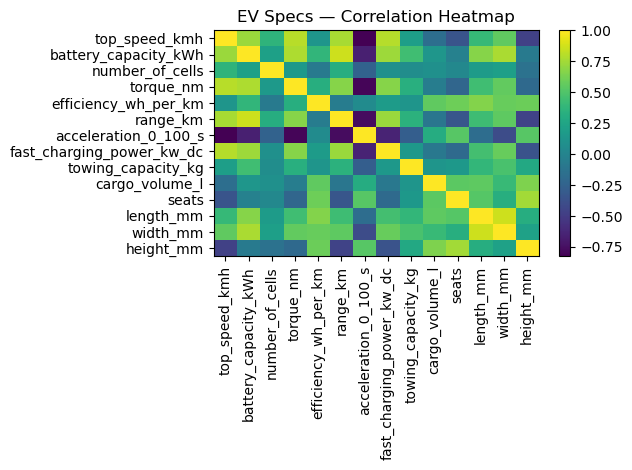

In [70]:
num_cols = specs.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = specs[num_cols].corr()
    display(corr)
    plt.figure()
    plt.imshow(corr, aspect="auto")
    plt.title("EV Specs — Correlation Heatmap")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.colorbar(); plt.tight_layout(); plt.show()
else:
    print("\n(not enough numeric columns in specs for a correlation heatmap)")

The heatmap reveals clear relationships among EV specifications. Larger batteries and higher cell counts strongly correlate with longer range, while greater torque aligns with stronger towing capacity and quicker acceleration. Acceleration stands out because it shows a distinct negative correlation with several other specifications, such as top speed, battery capacity, torque, and range, indicating a trade-off between rapid acceleration and sustained performance.

Conversely, energy efficiency (Wh/km) inversely relates to range, as vehicles that consume more energy per kilometer tend to travel shorter distances. Physical dimensions, length, width, and height, also cluster closely, suggesting that size-related features scale together.

Overall, the data confirms expected engineering trade-offs between performance, efficiency, and design, emphasizing how battery and powertrain factors dominate EV behavior.

*Next steps:* Reduce multicollinearity by combining or dropping redundant features (e.g., battery_capacity_kWh vs number_of_cells), then test how these streamlined variables influence range or price in a regression model.